In [76]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [122]:
import pandas as pd
import numpy as np
import pymc3 as pm
import arviz as az
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [139]:
df.groupby('neighborhood_change').size()

neighborhood_change
declining               422
gentrifying              73
inclusively growing     896
unchanging             2672
dtype: int64

In [ ]:
73 / len(df)

In [142]:
df = pd.read_csv("/Users/gabrielgilling/Documents/GitHub/Bayesian-Blogs/Bayesian-Blogs/selected_features_model_df_2017_sprint3.csv")

In [143]:
df.head()

,acs_key,median_hh_income,median_hh_income_margin,owner_occupied_margin,avg_home_value,avg_home_value_margin,median_gross_rent,median_gross_rent_margin,income_more_than_200000,income_more_than_200000_margin,cbsa,fips,prop_vacant_hh,avg_home_value_zillow,median_gross_rent_zillow,neighborhood_change,current_PBV,current_HCV,current_hcv_percent_occupied,24_months_back_PBV,24_months_back_HCV,12_months_back_PBV,12_months_back_HCV,hcv_change_12_months,hcv_change_24_months,pbv_change_12_months,pbv_change_24_months,hcv_rate_change_24_months,hcv_rate_change_12_months,pbv_rate_change_12_months,24months_back_mean_house_val,12months_back_mean_house_val,current_mean_house_val,24months_back_mean_rent,12months_back_mean_rent,current_mean_rent,rental_vacancy_rate_2013,prop_vacant_hh_2013,is_eligible_gent,is_eligible_decl,abs_change_avg_home_value,pct_change_avg_home_value,abs_change_median_gross_rent,pct_change_median_gross_rent,abs_change_count_above_0.8_income,pct_change_count_above_0.8_income,abs_change_count_below_0.8_income,abs_change_prop_no_bachelors,abs_change_prop_owner_occupied,pct_change_prop_owner_occupied,abs_change_prop_renter_occupied,abs_change_owner_occupied,pct_change_owner_occupied,abs_change_renter_occupied,diff_12months_back_mean_house_val,diff_24months_back_mean_house_val,diff_12months_back_mean_rent,diff_24months_back_mean_rent,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_25
0,"Census Tract 1030, Arlington County, Virginia:...",130625.0,12856.0,132,4.182387e+05,10300.0,2164.0,93.0,334,79,47900,51013103000,0.039988,4.182387e+05,1907.833333,unchanging,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.182387e+05,4.257398e+05,4.345108e+05,1907.833333,1949.500000,1976.166667,5.6,0.031585,False,False,6.613333e+02,0.001579,-320.0,-0.173536,51,0.016119,-21,-0.002454,-0.006871,-0.018994,0.006286,-12,-0.009885,25,8771.000000,16272.166667,26.666667,68.333333,356,487,338,274,216,201,164,95,160,87,74,65,94,15
1,"Census Tract 1003, Arlington County, Virginia:...",208542.0,32613.0,102,2.046781e+06,68583.0,3271.0,270.0,997,139,47900,51013100300,0.033284,2.046781e+06,2727.227062,unchanging,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.046781e+06,2.049279e+06,2.088649e+06,2727.227062,2773.086519,2858.497655,13.9,0.032067,False,False,-1.101181e+06,-1.164531,-1270.0,-0.634683,160,0.029504,-16,0.037251,-0.024362,-0.077135,0.016828,-87,-0.049348,96,39369.333333,41867.833333,85.411136,131.270593,141,166,137,363,335,518,545,135,395,122,255,238,137,173
2,"Census Tract 1005, Arlington County, Virginia:...",163333.0,24267.0,78,1.589096e+06,27767.0,1800.0,254.0,681,87,47900,51013100500,0.011060,1.589096e+06,2683.953065,unchanging,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.589096e+06,1.599268e+06,1.635032e+06,2683.953065,2727.826628,2809.897510,0.0,0.010477,False,False,-7.734958e+05,-0.948376,13.0,0.007170,-62,-0.013674,-53,-0.022154,0.005605,0.020888,0.004032,-4,-0.003187,10,35764.333333,45936.166667,82.070881,125.944444,212,226,329,548,364,331,309,90,187,75,112,90,127,51
3,"Census Tract 1006, Arlington County, Virginia:...",121607.0,17454.0,86,1.589096e+06,67003.0,1767.0,99.0,287,74,47900,51013100600,0.032152,1.589096e+06,2722.733474,unchanging,0.0,35.0,94.0,0.0,38.0,0.0,37.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.589096e+06,1.599268e+06,1.635032e+06,2722.733474,2768.252463,2854.104595,16.4,0.035317,False,False,-8.573958e+05,-1.171786,-215.0,-0.138531,20,0.007112,-10,-0.022855,0.059427,0.207214,-0.057163,184,0.209806,-173,35764.333333,45936.166667,85.852132,131.371120,299,158,150,326,268,283,273,72,106,28,76,129,70,64
4,"Census Tract 1009, Arlington County, Virginia:...",133000.0,17285.0,89,1.761467e+06,26263.0,1134.0,63.0,552,81,47900,51013100900,0.004627,1.761467e+06,421.937711,unchanging,0.0,30.0,94.0,0.0,32.0,0.0,29.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.761467e+06,1.772698e+06,1.824055e+06,421.937711,428.997756,442.317621,0.0,0.018841,False,False,-9.912668e+05,-1.287025,-22

In [89]:
df.isnull().sum()

acs_key                                0
median_hh_income                       0
median_hh_income_margin                0
owner_occupied_margin                  0
avg_home_value                         0
avg_home_value_margin                  0
median_gross_rent                      0
median_gross_rent_margin               0
income_more_than_200000                0
income_more_than_200000_margin         0
cbsa                                   0
fips                                   0
prop_vacant_hh                         0
avg_home_value_zillow                325
median_gross_rent_zillow             325
neighborhood_change                    0
current_PBV                            0
current_HCV                            0
current_hcv_percent_occupied           0
24_months_back_PBV                     0
24_months_back_HCV                     0
12_months_back_PBV                     0
12_months_back_HCV                     0
hcv_change_12_months                   0
hcv_change_24_mo

In [144]:
df.is_eligible_decl = np.where(df.is_eligible_decl == True, 1 , 0)
df.is_eligible_gent = np.where(df.is_eligible_gent == True, 1 , 0)

In [145]:
sum(df.is_eligible_gent)

1120

In [146]:
df['is_gentrifying'] =  np.where(df.neighborhood_change == 'gentrifying', 1, 0)

In [147]:
df = df.dropna()

In [156]:
df.shape

(3738, 73)

In [165]:
X = df.drop(["acs_key", 'fips', 'neighborhood_change', 'is_gentrifying', 'is_eligible_gent', 'is_eligible_decl'], axis = 1)
y = df['is_gentrifying']

In [166]:
num_cbsa = len(df.cbsa.unique())
cbsa_values = df.cbsa.values
X.cbsa = X.cbsa.astype(str)

In [167]:
X.shape

(3738, 67)

In [159]:
X = pd.get_dummies(X)
X_scaled = preprocessing.StandardScaler().fit_transform(X)

In [97]:
df.groupby(['cbsa'])['is_gentrifying'].value_counts()

cbsa   is_gentrifying
12580  0                  659
       1                   24
16740  0                  529
       1                   10
17460  0                  628
       1                   10
39580  0                  218
       1                    6
40060  0                  287
       1                    8
47900  0                 1350
       1                    9
Name: is_gentrifying, dtype: int64

In [168]:
X.head()

,median_hh_income,median_hh_income_margin,owner_occupied_margin,avg_home_value,avg_home_value_margin,median_gross_rent,median_gross_rent_margin,income_more_than_200000,income_more_than_200000_margin,cbsa,prop_vacant_hh,avg_home_value_zillow,median_gross_rent_zillow,current_PBV,current_HCV,current_hcv_percent_occupied,24_months_back_PBV,24_months_back_HCV,12_months_back_PBV,12_months_back_HCV,hcv_change_12_months,hcv_change_24_months,pbv_change_12_months,pbv_change_24_months,hcv_rate_change_24_months,hcv_rate_change_12_months,pbv_rate_change_12_months,24months_back_mean_house_val,12months_back_mean_house_val,current_mean_house_val,24months_back_mean_rent,12months_back_mean_rent,current_mean_rent,rental_vacancy_rate_2013,prop_vacant_hh_2013,abs_change_avg_home_value,pct_change_avg_home_value,abs_change_median_gross_rent,pct_change_median_gross_rent,abs_change_count_above_0.8_income,pct_change_count_above_0.8_income,abs_change_count_below_0.8_income,abs_change_prop_no_bachelors,abs_change_prop_owner_occupied,pct_change_prop_owner_occupied,abs_change_prop_renter_occupied,abs_change_owner_occupied,pct_change_owner_occupied,abs_change_renter_occupied,diff_12months_back_mean_house_val,diff_24months_back_mean_house_val,diff_12months_back_mean_rent,diff_24months_back_mean_rent,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_25
0,130625.0,12856.0,132,4.182387e+05,10300.0,2164.0,93.0,334,79,47900,0.039988,4.182387e+05,1907.833333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.182387e+05,4.257398e+05,4.345108e+05,1907.833333,1949.500000,1976.166667,5.6,0.031585,6.613333e+02,0.001579,-320.0,-0.173536,51,0.016119,-21,-0.002454,-0.006871,-0.018994,0.006286,-12,-0.009885,25,8771.000000,16272.166667,26.666667,68.333333,356,487,338,274,216,201,164,95,160,87,74,65,94,15
1,208542.0,32613.0,102,2.046781e+06,68583.0,3271.0,270.0,997,139,47900,0.033284,2.046781e+06,2727.227062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.046781e+06,2.049279e+06,2.088649e+06,2727.227062,2773.086519,2858.497655,13.9,0.032067,-1.101181e+06,-1.164531,-1270.0,-0.634683,160,0.029504,-16,0.037251,-0.024362,-0.077135,0.016828,-87,-0.049348,96,39369.333333,41867.833333,85.411136,131.270593,141,166,137,363,335,518,545,135,395,122,255,238,137,173
2,163333.0,24267.0,78,1.589096e+06,27767.0,1800.0,254.0,681,87,47900,0.011060,1.589096e+06,2683.953065,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.589096e+06,1.599268e+06,1.635032e+06,2683.953065,2727.826628,2809.897510,0.0,0.010477,-7.734958e+05,-0.948376,13.0,0.007170,-62,-0.013674,-53,-0.022154,0.005605,0.020888,0.004032,-4,-0.003187,10,35764.333333,45936.166667,82.070881,125.944444,212,226,329,548,364,331,309,90,187,75,112,90,127,51
3,121607.0,17454.0,86,1.589096e+06,67003.0,1767.0,99.0,287,74,47900,0.032152,1.589096e+06,2722.733474,0.0,35.0,94.0,0.0,38.0,0.0,37.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.589096e+06,1.599268e+06,1.635032e+06,2722.733474,2768.252463,2854.104595,16.4,0.035317,-8.573958e+05,-1.171786,-215.0,-0.138531,20,0.007112,-10,-0.022855,0.059427,0.207214,-0.057163,184,0.209806,-173,35764.333333,45936.166667,85.852132,131.371120,299,158,150,326,268,283,273,72,106,28,76,129,70,64
4,133000.0,17285.0,89,1.761467e+06,26263.0,1134.0,63.0,552,81,47900,0.004627,1.761467e+06,421.937711,0.0,30.0,94.0,0.0,32.0,0.0,29.0,-1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.761467e+06,1.772698e+06,1.824055e+06,421.937711,428.997756,442.317621,0.0,0.018841,-9.912668e+05,-1.287025,-22.0,-0.019784,31,0.007076,44,0.000048,-0.022124,-0.109153,0.009468,-90,-0.091931,56,51357.250000,62588.333333,13.319865,20.379910,488,272,395,352,326,308,331,68,240,75,164,88,69,79


In [160]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

base = sm.Logit(y, X)

In [164]:
(X.corr())

,median_hh_income,median_hh_income_margin,owner_occupied_margin,avg_home_value,avg_home_value_margin,median_gross_rent,median_gross_rent_margin,income_more_than_200000,income_more_than_200000_margin,prop_vacant_hh,avg_home_value_zillow,median_gross_rent_zillow,current_PBV,current_HCV,current_hcv_percent_occupied,24_months_back_PBV,24_months_back_HCV,12_months_back_PBV,12_months_back_HCV,hcv_change_12_months,hcv_change_24_months,pbv_change_12_months,pbv_change_24_months,hcv_rate_change_24_months,hcv_rate_change_12_months,pbv_rate_change_12_months,24months_back_mean_house_val,12months_back_mean_house_val,current_mean_house_val,24months_back_mean_rent,12months_back_mean_rent,current_mean_rent,rental_vacancy_rate_2013,prop_vacant_hh_2013,abs_change_avg_home_value,pct_change_avg_home_value,abs_change_median_gross_rent,pct_change_median_gross_rent,abs_change_count_above_0.8_income,pct_change_count_above_0.8_income,abs_change_count_below_0.8_income,abs_change_prop_no_bachelors,abs_change_prop_owner_occupied,pct_change_prop_owner_occupied,abs_change_prop_renter_occupied,abs_change_owner_occupied,pct_change_owner_occupied,abs_change_renter_occupied,diff_12months_back_mean_house_val,diff_24months_back_mean_house_val,diff_12months_back_mean_rent,diff_24months_back_mean_rent,age_11,age_12,age_13,age_14,age_15,age_16,age_17,age_18,age_19,age_20,age_21,age_22,age_23,age_25,cbsa_12580,cbsa_16740,cbsa_17460,cbsa_39580,cbsa_40060,cbsa_47900
median_hh_income,1.000000,0.625344,-0.015007,0.603783,0.241565,0.779908,0.431800,0.812713,0.665428,-0.405103,0.568910,0.406196,-0.218639,-0.365950,-0.433840,-0.210201,-0.378023,-0.215449,-0.373092,-0.012088,-0.015159,0.051412,0.048017,-0.137387,-0.244133,-0.220106,0.581875,0.575735,0.570456,0.406196,0.398817,0.393748,-0.030643,-0.450311,-0.290854,-0.025857,-0.427775,-0.271770,-0.107134,-0.053533,0.056684,-0.030875,-0.035536,0.000379,0.085449,-0.134033,-0.051317,0.058270,0.212056,0.124285,-0.013969,-0.020392,-0.077082,0.005457,0.145908,0.278361,0.337230,0.329918,0.288987,0.228177,0.231337,0.213654,0.239004,0.173867,0.075533,0.020415,-0.022585,-0.188364,-0.291253,-0.031028,-0.101858,0.455906
median_hh_income_margin,0.625344,1.000000,-0.048358,0.437940,0.307844,0.452076,0.292921,0.531003,0.443432,-0.202289,0.409263,0.299254,-0.098531,-0.208270,-0.271413,-0.090368,-0.222455,-0.096064,-0.220410,-0.046106,-0.034309,0.033500,0.042727,-0.089385,-0.154410,-0.093965,0.412624,0.409845,0.406918,0.299254,0.294810,0.291907,-0.009217,-0.233587,-0.213088,-0.014293,-0.247579,-0.181553,-0.050987,-0.041683,0.033126,-0.033575,-0.025716,-0.004235,0.074456,-0.069931,-0.026447,0.051093,0.169277,0.122658,0.012350,0.012371,-0.086298,-0.049993,-0.001974,0.080916,0.119429,0.116221,0.084147,0.065443,0.055823,0.062806,0.099180,0.052506,0.006392,0.002181,-0.001434,-0.096749,-0.230334,-0.019440,-0.090008,0.312002
owner_occupied_margin,-0.015007,-0.048358,1.000000,0.036550,-0.064995,-0.015222,-0.067972,0.153956,0.406130,-0.154494,0.055284,0.023760,-0.009082,0.120582,0.149135,0.002476,0.121306,-0.000311,0.122119,-0.006639,-0.010372,0.037154,0.034785,0.047752,0.061833,0.012411,0.073597,0.076045,0.077749,0.023760,0.024233,0.028124,0.098266,-0.148635,-0.097192,-0.138984,0.058687,0.044852,-0.239332,-0.080839,-0.132888,0.002635,0.072677,0.074487,0.000636,-0.080758,-0.011820,-0.190166,0.080972,0.096518,0.111988,0.075272,0.475185,0.599697,0.671264,0.671796,0.636792,0.610156,0.597096,0.483901,0.516446,0.484646,0.479253,0.499346,0.429307,0.228674,-0.040248,0.128174,-0.147776,0.183691,0.012406,-0.043279
avg_home_value,0.603783,0.437940,0.036550,1.000000,0.370135,0.523663,0.223490,0.633272,0.510899,-0.231314,0.948761,0.175003,-0.058628,-0.161398,-0.218622,-0.054158,-0.173220,-0.055499,-0.168659,-0.024513,-0.029189,0.027585,0.022334,-0.054873,-0.112387,-0.068752,0.809440,0.808884,0.807141,0.175003,0.168999,0.167072,-0.023377,-0.238744,-0.904145,-0.608892,-0.297606,-0.201977,-0.115645,-0.078933,-0.008523,-0.011464,-0.019577,-0.008129,0.053287,-0.112652

In [161]:
base.fit()

         Current function value: inf
         Iterations: 35


/Users/gabrielgilling/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/gabrielgilling/opt/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [118]:
model = LogisticRegression(fit_intercept = True)
mdl = model.fit(X_scaled, y)

/Users/gabrielgilling/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(array([[0.000e+00, 2.000e+00, 1.000e+00, 5.000e+00, 2.000e+00, 1.200e+01,
         1.800e+01, 3.900e+01, 8.500e+01, 3.574e+03],
        [3.574e+03, 8.500e+01, 3.900e+01, 1.800e+01, 1.200e+01, 2.000e+00,
         5.000e+00, 1.000e+00, 2.000e+00, 0.000e+00]]),
 array([2.95751778e-13, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 2 BarContainer objects>)

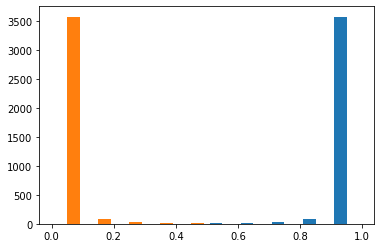

In [126]:
plt.hist(mdl.predict_proba(X_scaled))

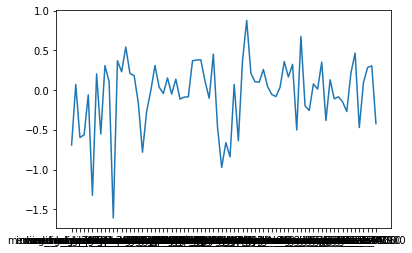

In [134]:
plt.plot(X.columns, mdl.coef_[0] )

In [130]:
len((mdl.coef_)[0])

74

In [73]:
with pm.Model() as no_pooling_model:
    #Fit a unique intercept for each cbsa, note the shape parameter!
    alpha_j = pm.Normal("alpha_j", mu = 0, sd = 2.5, shape = num_cbsa)

    p_j = pm.math.invlogit(alpha_j[cbsa_values])

    g_likelihood = pm.Binomial('g_likelihood', n = sim_data['Ni'], p = p_j, observed = sim_data['Si'])

IndexError: index 47900 is out of bounds for size 8

In [75]:
preds = '+'.join(list(X.drop(['cbsa'], axis = 1).columns))

In [83]:
form = "is_gentrifying ~" + preds + " + (1|cbsa)"

In [84]:
form

'is_gentrifying ~median_hh_income+median_hh_income_margin+owner_occupied_margin+B01001_011E+B01001_012E+B01001_013E+B01001_014E+B01001_015E+B01001_016E+B01001_017E+B01001_018E+B01001_019E+B01001_020E+B01001_021E+B01001_022E+B01001_023E+B01001_024E+B01001_025E+B01001_035E+B01001_036E+B01001_037E+B01001_038E+B01001_039E+B01001_040E+B01001_041E+B01001_042E+B01001_043E+B01001_044E+B01001_045E+B01001_046E+B01001_047E+B01001_049E+avg_home_value_margin+median_gross_rent_margin+income_more_than_200000+income_more_than_200000_margin+prop_vacant_hh+current_PBV+current_HCV+current_hcv_percent_occupied+hcv_change_12_months+hcv_change_24_months+pbv_change_12_months+hcv_rate_change_24_months+hcv_rate_change_12_months+pbv_rate_change_12_months+months_back_mean_house_val_24+months_back_mean_house_val_12+current_mean_house_val+months_back_mean_rent_24+months_back_mean_rent_12+current_mean_rent+rental_vacancy_rate_2013+prop_vacant_hh_2013+is_eligible_gent+is_eligible_decl+abs_change_avg_home_value+pct_c

In [85]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula(
        form, df, family=pm.glm.families.Binomial()
    )
    trace = pm.sample(1000, tune=1000, init="adapt_diag")

/Users/gabrielgilling/opt/anaconda3/lib/python3.7/site-packages/pymc3/sampling.py:469: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [1 | cbsa, abs_change_renter_occupied, pct_change_owner_occupied, abs_change_owner_occupied, abs_change_prop_renter_occupied, pct_change_prop_owner_occupied, abs_change_prop_owner_occupied, abs_change_prop_no_bachelors, abs_change_count_below_08_income, pct_change_count_above_0_8_income, abs_change_count_above_0_8_income, pct_change_median_gross_rent, abs_change_median_gross_rent, pct_change_avg_home_value, abs_change_avg_home_value, prop_vacant_hh_2013, rental_vacancy_rate_2013, current_mean_rent, months_back_mean_rent_12, months_back

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1162 seconds.
There were 886 divergences after tuning. Increase `target_accept` or reparameterize.
There were 822 divergences after tuning. Increase `target_accept` or reparameterize.
There were 962 divergences after tuning. Increase `target_accept` or reparameterize.
There were 877 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


In [88]:
with logistic_model:
    display(az.summary(trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,-1.22,0.85,-3.04,0.17,0.05,0.04,272.57,272.57,274.15,298.84,1.02
is_eligible_gent[T.True],0.77,0.73,-0.58,2.12,0.05,0.04,229.68,203.36,242.55,277.89,1.01
is_eligible_decl[T.True],-0.04,0.72,-1.34,1.34,0.05,0.03,231.42,231.42,245.81,272.45,1.01
median_hh_income,-0.00,0.00,-0.00,0.00,0.00,0.00,288.84,288.84,287.39,584.38,1.02
median_hh_income_margin,0.00,0.00,-0.00,0.00,0.00,0.00,312.37,267.25,316.94,303.24,1.01
...,...,...,...,...,...,...,...,...,...,...,...
abs_change_prop_renter_occupied,11.89,7.84,-2.01,26.89,0.65,0.47,145.78,140.45,146.45,340.29,1.02
abs_change_owner_occupied,0.00,0.00,-0.00,0.01,0.00,0.00,152.69,152.69,153.91,385.54,1.02
pct_change_owner_occupied,-6.05,2.43,-10.60,-1.58,0.18,0.14,173.39,157.90,180.05,249.32,1.03
abs_change_renter_occupied,0.00,0.00,-0.00,0.01,0.00,0.00,139.08,139.08,138.80,330.18,1.02
